In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Basic Plot

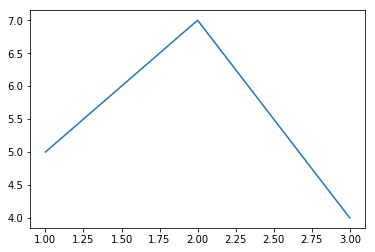

In [3]:
plt.plot([1,2,3],[5,7,4])

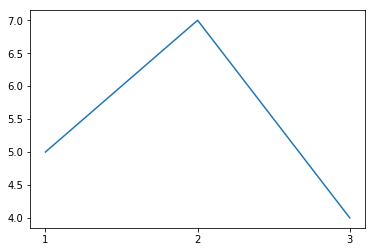

In [4]:
ax = plt.subplot2grid((1,1), (0,0))
ax.plot([1,2,3],[5,7,4])
ax.set_xticks([1, 2, 3])
plt.show()

In [5]:
#help(plt.subplot2grid)

# Multiple Plots

In [6]:
x = [1, 2, 3]
y = [5, 7, 4]

x2 = [1, 2, 3]
y2 = [10, 14, 12]

Text(0.5, 1.0, 'This is the title\nThe title can have more than one line.')

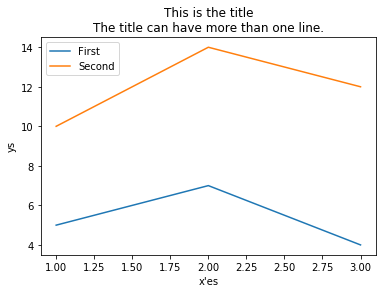

In [7]:
plt.plot(x, y, label='First')
plt.plot(x2, y2, label='Second')
plt.xlabel('x\'es')
plt.ylabel('ys')
plt.legend()
plt.title('This is the title\nThe title can have more than one line.')

# Bar Charts and Histograms

Text(0.5, 1.0, 'Bar Chart')

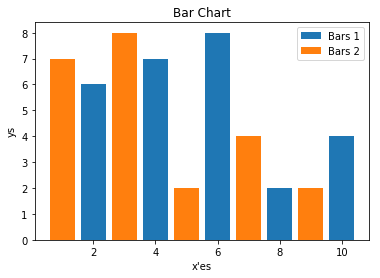

In [8]:
x = [2, 4, 6, 8 , 10]
y = [6, 7, 8, 2, 4]

x2 = [1, 3, 5, 7, 9]
y2 = [7, 8, 2, 4, 2]

plt.bar(x, y, label='Bars 1')
plt.bar(x2, y2, label='Bars 2')

plt.xlabel('x\'es')
plt.ylabel('ys')
plt.legend()
plt.title('Bar Chart')

Text(0.5, 1.0, 'Age Frequency Distribution')

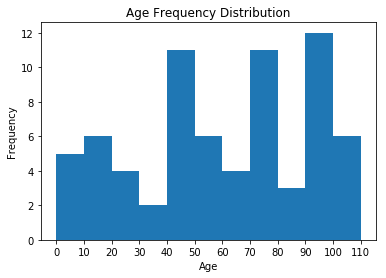

In [9]:
ages = [
    3, 4, 4, 2, 3,
    10, 14, 13, 12, 11, 12,
    22, 23, 26, 27,
    33, 31, 
    44, 42, 41, 45, 47, 48, 44, 40, 46, 46, 47,
    55, 52, 55, 53, 56, 59,
    60, 63, 64, 66,
    77, 70, 78, 78, 79, 73, 72, 79, 78, 77, 76,
    80, 88, 81,
    90, 92, 99, 94, 95, 93, 94, 90, 99, 94, 95, 96,
    100, 101, 105, 108, 107, 100
]
bins = [i*10 for i in range(0, 12)]

#print(np.histogram([i*10 for i in range(0, 11)], bins=bins))
#plt.hist(ages, bins=bins, align='left', histtype='bar', rwidth=0.8)
plt.hist(ages, bins=bins, histtype='bar')
plt.xticks(bins)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Distribution')

# Scatter Plots

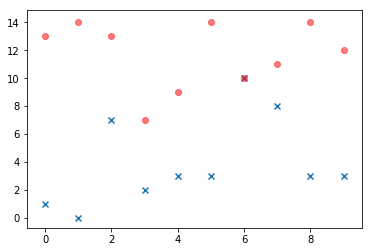

In [21]:
x = [i for i in range(10)]
y = [random.randint(0, 10) for i in range(len(x))]

y2 = [random.randint(5, 20) for i in range(len(x))]

plt.scatter(x, y, marker='x')
plt.scatter(x, y2, color='r', alpha=0.5)

# Stack Plots

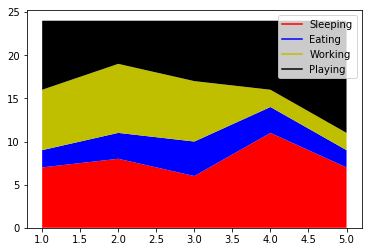

In [24]:
days = [1, 2, 3, 4, 5]
sleeping = [7, 8, 6, 11, 7]
eating = [2, 3, 4, 3, 2]
working = [7, 8, 7, 2, 2]
playing = [8, 5, 7, 8, 13]

plt.plot([], [], color='r', label="Sleeping")
plt.plot([], [], color='b', label="Eating")
plt.plot([], [], color='y', label="Working")
plt.plot([], [], color='k', label="Playing")

plt.stackplot(days, 
              sleeping, eating, working, playing,
              colors=['r', 'b', 'y', 'k']
             )

plt.legend()

# Pie Charts

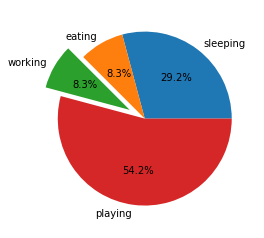

In [27]:
slices = [7, 2, 2, 13]
activities = ['sleeping', 'eating', 'working', 'playing']

plt.pie(slices, 
        labels=activities, 
        explode=(0, 0, 0.2, 0),
        autopct='%1.1f%%'
       )
plt.show()

# Reading Files

In [28]:
import csv

In [29]:
x, y = [], []

with open('example-data.csv') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
        
x, y

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [3, 5, 9, 7, 3, 6, 1, 2, 3, 6])

In [32]:
x, y = np.loadtxt('example-data.csv', 
                  delimiter=',', 
                  unpack=True,
                  dtype='int'
                 )
x, y

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([3, 5, 9, 7, 3, 6, 1, 2, 3, 6]))

In [33]:
df = pd.read_csv('example-data.csv', header=None)
df

,0,1
0,1,3
1,2,5
2,3,9
3,4,7
4,5,3
5,6,6
6,7,1
7,8,2
8,9,3
9,10,6


In [34]:
df = pd.read_csv('example-data-with-header.csv')
df

,x,y
0,1,3
1,2,5
2,3,9
3,4,7
4,5,3
5,6,6
6,7,1
7,8,2
8,9,3
9,10,6


# Reading Data from the Internet

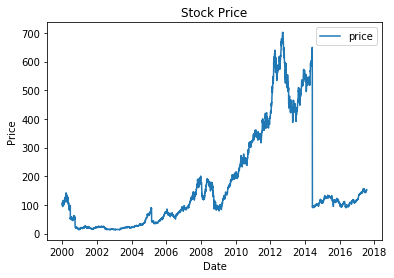

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib
import matplotlib.dates as mdates




def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'  
source_code = urllib.request.urlopen(stock_price_url).read().decode()   
stock_data = []
split_source = source_code.split('\n')


for line in split_source[1:]:
    stock_data.append(line)
        
Date, Open, High, Low, Close, Adjusted_Close, Volume = np.loadtxt(stock_data, delimiter=',',unpack=True, converters={0: bytespdate2num('%Y-%m-%d')})
 
plt.plot_date(Date, Open, '-', label='price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price')
plt.legend()
plt.show()

# Messing Around with Stock Prices

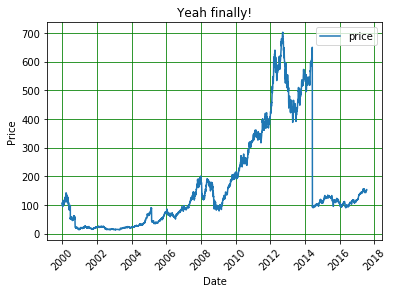

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib
import matplotlib.dates as mdates




def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
ax1.grid(True, color='g', linestyle='-')


stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'  
source_code = urllib.request.urlopen(stock_price_url).read().decode()   
stock_data = []
split_source = source_code.split('\n')


for line in split_source[1:]:
    stock_data.append(line)
        
Date, Open, High, Low, Close, Adjusted_Close, Volume = np.loadtxt(stock_data, delimiter=',',unpack=True, converters={0: bytespdate2num('%Y-%m-%d')})
 
ax1.plot_date(Date, Open, '-', label='price')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Yeah finally!')
plt.legend()
plt.show()

In [37]:
for e in zip(Date, Open, High, Low, Close, Adjusted_Close, Volume):
    print(e)

(736536.0, 153.35, 153.93, 153.06, 153.5, 153.5, 12778195.0)
(736535.0, 151.8, 153.84, 151.8, 152.74, 152.74, 18714400.0)
(736534.0, 150.58, 152.44, 149.9, 152.09, 152.09, 21304700.0)
(736531.0, 149.99, 150.44, 148.88, 150.27, 150.27, 26252630.0)
(736530.0, 151.5, 151.74, 150.19, 150.34, 150.34, 17243748.0)
(736529.0, 150.48, 151.42, 149.95, 151.02, 151.02, 20922969.0)
(736528.0, 149.2, 150.13, 148.67, 150.08, 150.08, 17868792.0)
(736527.0, 148.82, 150.9, 148.57, 149.56, 149.56, 23243713.0)
(736524.0, 147.97, 149.33, 147.33, 149.04, 149.04, 20132061.0)
(736523.0, 145.5, 148.49, 145.44, 147.77, 147.77, 25199373.0)
(736522.0, 145.87, 146.18, 144.82, 145.74, 145.74, 24884478.0)
(736521.0, 144.73, 145.85, 144.38, 145.53, 145.53, 19781836.0)
(736520.0, 144.11, 145.95, 143.37, 145.06, 145.06, 21090636.0)
(736517.0, 142.9, 144.75, 142.9, 144.18, 144.18, 19201712.0)
(736516.0, 143.02, 143.5, 142.41, 142.73, 142.73, 24128782.0)
(736515.0, 143.69, 144.79, 142.72, 144.09, 144.09, 21569557.0)
(736

(732673.0, 80.22, 81.25, 79.65, 80.87, 10.4351, 39995600.0)
(732672.0, 78.15, 82.0, 76.77, 81.52, 10.519, 69134100.0)
(732671.0, 82.15, 82.57, 80.89, 81.51, 10.5177, 17524600.0)
(732667.0, 83.46, 84.0391, 81.6, 82.2, 10.6067, 21903700.0)
(732666.0, 84.6956, 85.48, 82.2, 82.9, 10.697, 32271400.0)
(732665.0, 86.47, 86.67, 84.74, 84.76, 10.937, 20274700.0)
(732664.0, 84.73, 86.68, 83.62, 86.31, 11.137, 32550200.0)
(732663.0, 87.625, 88.0, 84.59, 85.47, 11.0287, 25770600.0)
(732660.0, 89.02, 89.22, 87.33, 87.72, 11.319, 26426400.0)
(732659.0, 89.05, 90.0, 88.26, 88.55, 11.4261, 29726100.0)
(732658.0, 87.95, 89.07, 87.15, 89.05, 11.4906, 30609000.0)
(732657.0, 88.61, 88.84, 85.53, 86.14, 11.1151, 36665000.0)
(732656.0, 88.9, 89.3, 88.05, 88.75, 11.4519, 17849300.0)
(732653.0, 87.23, 89.39, 87.0, 88.26, 11.3887, 28009900.0)
(732652.0, 90.025, 90.5, 86.9, 87.04, 11.2312, 35886700.0)
(732651.0, 90.645, 91.39, 89.67, 89.83, 11.5912, 22792300.0)
(732650.0, 91.655, 92.33, 90.87, 91.27, 11.7771, 2

In [39]:
stock_data

['2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00',
 '2017-07-25,151.8000,153.8400,151.8000,152.7400,152.7400,18714400.00',
 '2017-07-24,150.5800,152.4400,149.9000,152.0900,152.0900,21304700.00',
 '2017-07-21,149.9900,150.4400,148.8800,150.2700,150.2700,26252630.00',
 '2017-07-20,151.5000,151.7400,150.1900,150.3400,150.3400,17243748.00',
 '2017-07-19,150.4800,151.4200,149.9500,151.0200,151.0200,20922969.00',
 '2017-07-18,149.2000,150.1300,148.6700,150.0800,150.0800,17868792.00',
 '2017-07-17,148.8200,150.9000,148.5700,149.5600,149.5600,23243713.00',
 '2017-07-14,147.9700,149.3300,147.3300,149.0400,149.0400,20132061.00',
 '2017-07-13,145.5000,148.4900,145.4400,147.7700,147.7700,25199373.00',
 '2017-07-12,145.8700,146.1800,144.8200,145.7400,145.7400,24884478.00',
 '2017-07-11,144.7300,145.8500,144.3800,145.5300,145.5300,19781836.00',
 '2017-07-10,144.1100,145.9500,143.3700,145.0600,145.0600,21090636.00',
 '2017-07-07,142.9000,144.7500,142.9000,144.1800,144.1800,192017

In [40]:
df = pd.DataFrame(map(lambda x: x.split(','), stock_data))
df.shape

(4419, 7)

In [42]:
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adjusted_Close', 'Volume']

In [43]:
df

,Date,Open,High,Low,Close,Adjusted_Close,Volume
0,2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00
1,2017-07-25,151.8000,153.8400,151.8000,152.7400,152.7400,18714400.00
2,2017-07-24,150.5800,152.4400,149.9000,152.0900,152.0900,21304700.00
3,2017-07-21,149.9900,150.4400,148.8800,150.2700,150.2700,26252630.00
4,2017-07-20,151.5000,151.7400,150.1900,150.3400,150.3400,17243748.00
5,2017-07-19,150.4800,151.4200,149.9500,151.0200,151.0200,20922969.00
6,2017-07-18,149.2000,150.1300,148.6700,150.0800,150.0800,17868792.00
7,2017-07-17,148.8200,150.9000,148.5700,149.5600,149.5600,23243713.00
8,2017-07-14,147.9700,149.3300,147.3300,149.0400,149.0400,20132061.00
9,2017-07-13,145.5000,148.4900,145.4400,147.7700,147.7700,25199373.00


# Gain and Loss

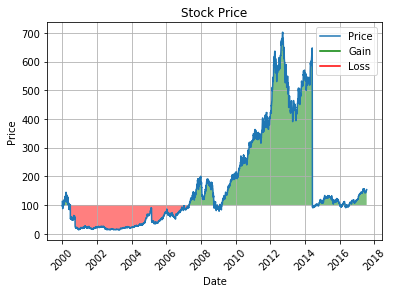

In [45]:
ax2 = plt.subplot2grid((1,1), (0,0))
ax2.plot_date(Date, Close, '-', label='Price')
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)
ax2.grid(True)

ax2.plot([], [], color='g', label='Gain')
ax2.plot([], [], color='r', label='Loss')

ax2.fill_between(Date, Close, 100, where=(Close > 100), facecolor='g', alpha=0.5)
ax2.fill_between(Date, Close, 100, where=(Close < 100), facecolor='r', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price')
plt.legend()
plt.show()

# Customizing Charts

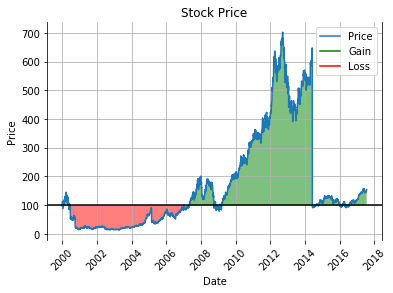

In [46]:
ax2 = plt.subplot2grid((1,1), (0,0))
ax2.plot_date(Date, Close, '-', label='Price')
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)
ax2.grid(True)

ax2.spines['left'].set_color('#060606')
ax2.spines['right'].set_color('#060606')
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax2.axhline(100, color='k')

ax2.plot([], [], color='g', label='Gain')
ax2.plot([], [], color='r', label='Loss')

ax2.fill_between(Date, Close, 100, where=(Close > 100), facecolor='g', alpha=0.5)
ax2.fill_between(Date, Close, 100, where=(Close < 100), facecolor='r', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price')
plt.legend()
plt.show()

# ASSIGNMENT

This tutorial should be completed individually by each student:

- https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

If you are hungry for more, take a look at this:

-  https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py

If you have nothing better to do, you can look at this:

- https://matplotlib.org/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py
- https://matplotlib.org/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py